<ipython-input-1-7224ab819c68>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)
<ipython-input-1-7224ab819c68>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)
<ipython-input-1-7224ab819c68>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, 

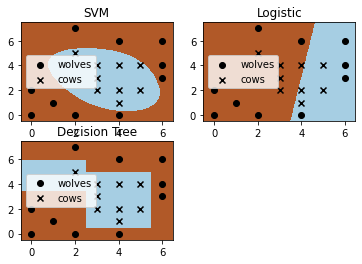

In [1]:
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
import pandas as pd

def plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr):
    x_min, x_max = df.x.min() - .5, df.x.max() + .5
    y_min, y_max = df.y.min() - .5, df.y.max() + .5

    # step between points.
    step = .02
    #
    # Sınırı çizmek için olası her noktanın bir matrisini oluşturacağız. Sonra ilgili
    #   sınıflandırıcıyı kullanarak her noktayı bir kurt yada ineğe bağlayacağız
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Tahminleri tekrar aynı matise yükleyelim
    Z = Z.reshape(xx.shape)

    # Bir subplot oluşturalım (her bir grafik üzerinde birden fazla yer olacak)
    pl.subplot(2, 2, plt_nmbr)
    # sınırları çiz
    pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

    # Kurt ve inekleri çizelim
    for animal in df.animal.unique():
        pl.scatter(df[df.animal==animal].x,
                   df[df.animal==animal].y,
                   marker=animal,
                   label="cows" if animal=="x" else "wolves",
                   color='black')
    pl.title(clf_name)
    pl.legend(loc="best")


data = open("Data\\cows_and_wolves.txt").read()
data = [row.split('\t') for row in data.strip().split('\n')]

animals = []
for y, row in enumerate(data):
    for x, item in enumerate(row):
        # x'ler inek', o'lar kurt
        if item in ['o', 'x']:
            animals.append([x, y, item])

df = pd.DataFrame(animals, columns=["x", "y", "animal"])
df['animal_type'] = df.animal.apply(lambda x: 0 if x=="x" else 1)

# x ve y koordinatlarını kullanarak eğitelim
train_cols = ["x", "y"]

clfs = {
    "SVM": svm.SVC(),
    "Logistic" : linear_model.LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier(),
}

plt_nmbr = 1
for clf_name, clf in clfs.items():
    clf.fit(df[train_cols], df.animal_type)
    plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr)
    plt_nmbr += 1
pl.show()